# EDA & Pre-Proccessing

In [1]:
# Libraries for data handling and visualisation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for encoding and scaling

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading the Dataset

df = pd.read_csv("/credit_card_churn.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.shape

(10127, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


### Clean dataset

In [7]:
df = df.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], axis=1)

In [8]:
df.shape

(10127, 21)

### Checking data quality

In [9]:
# Check duplicated rows
df.duplicated().sum()

0

In [10]:
# Check duplicated IDs
df['CLIENTNUM'].duplicated().any()

False

In [11]:
# Check for missing values
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
# Convert CLIENTNUM to string so it is treated as identifier
df['CLIENTNUM'] = df['CLIENTNUM'].astype(str)

In [13]:
df.dtypes

CLIENTNUM                    object
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Numerical EDA: Histogram, Outlier and Correlation analysis

In [14]:
# Select numerical columns for EDA
numerical_column_names = df.select_dtypes(include=['int64', 'float64']).columns

In [15]:
# Create copy for analysis and transformation

numerical_columns = df[numerical_column_names].copy()

numerical_columns['CLIENTNUM'] = df['CLIENTNUM']

In [16]:
numerical_columns.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CLIENTNUM
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,768805383
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,818770008
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,713982108
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,769911858
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,709106358


### Distribution Analysis

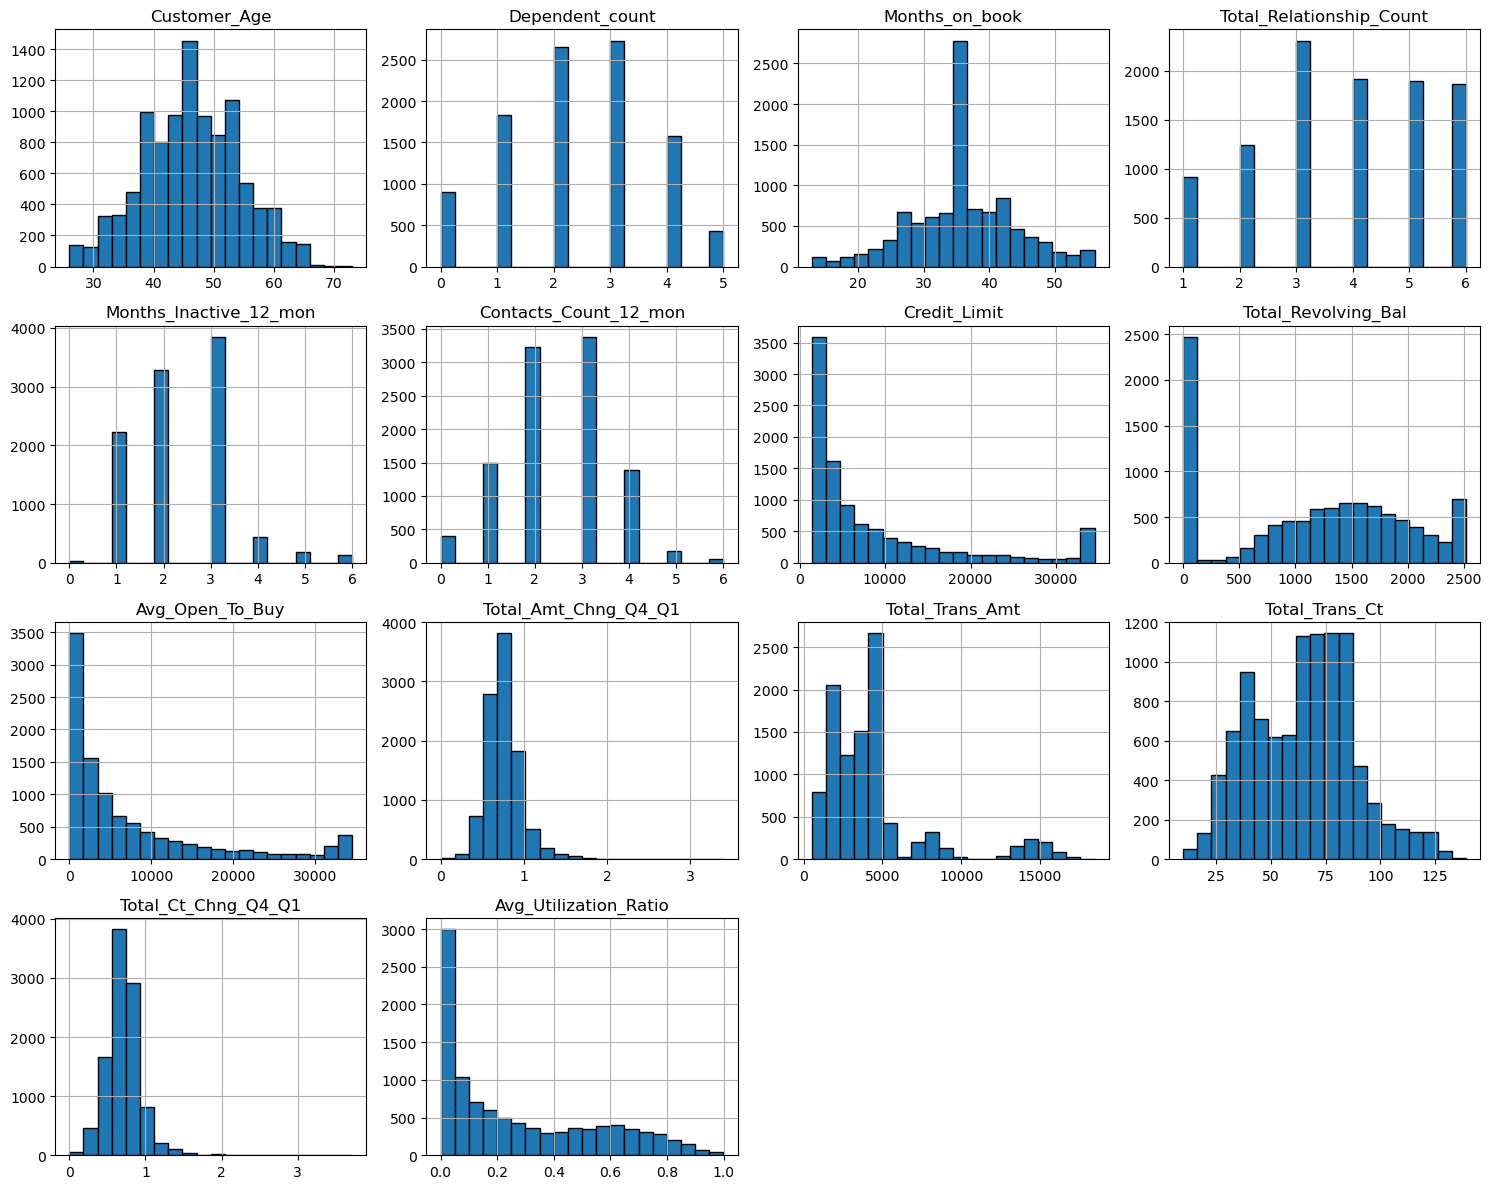

In [17]:
# Plot histograms
numerical_columns.hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.tight_layout()
plt.show()

### Boxplots to detect outliers

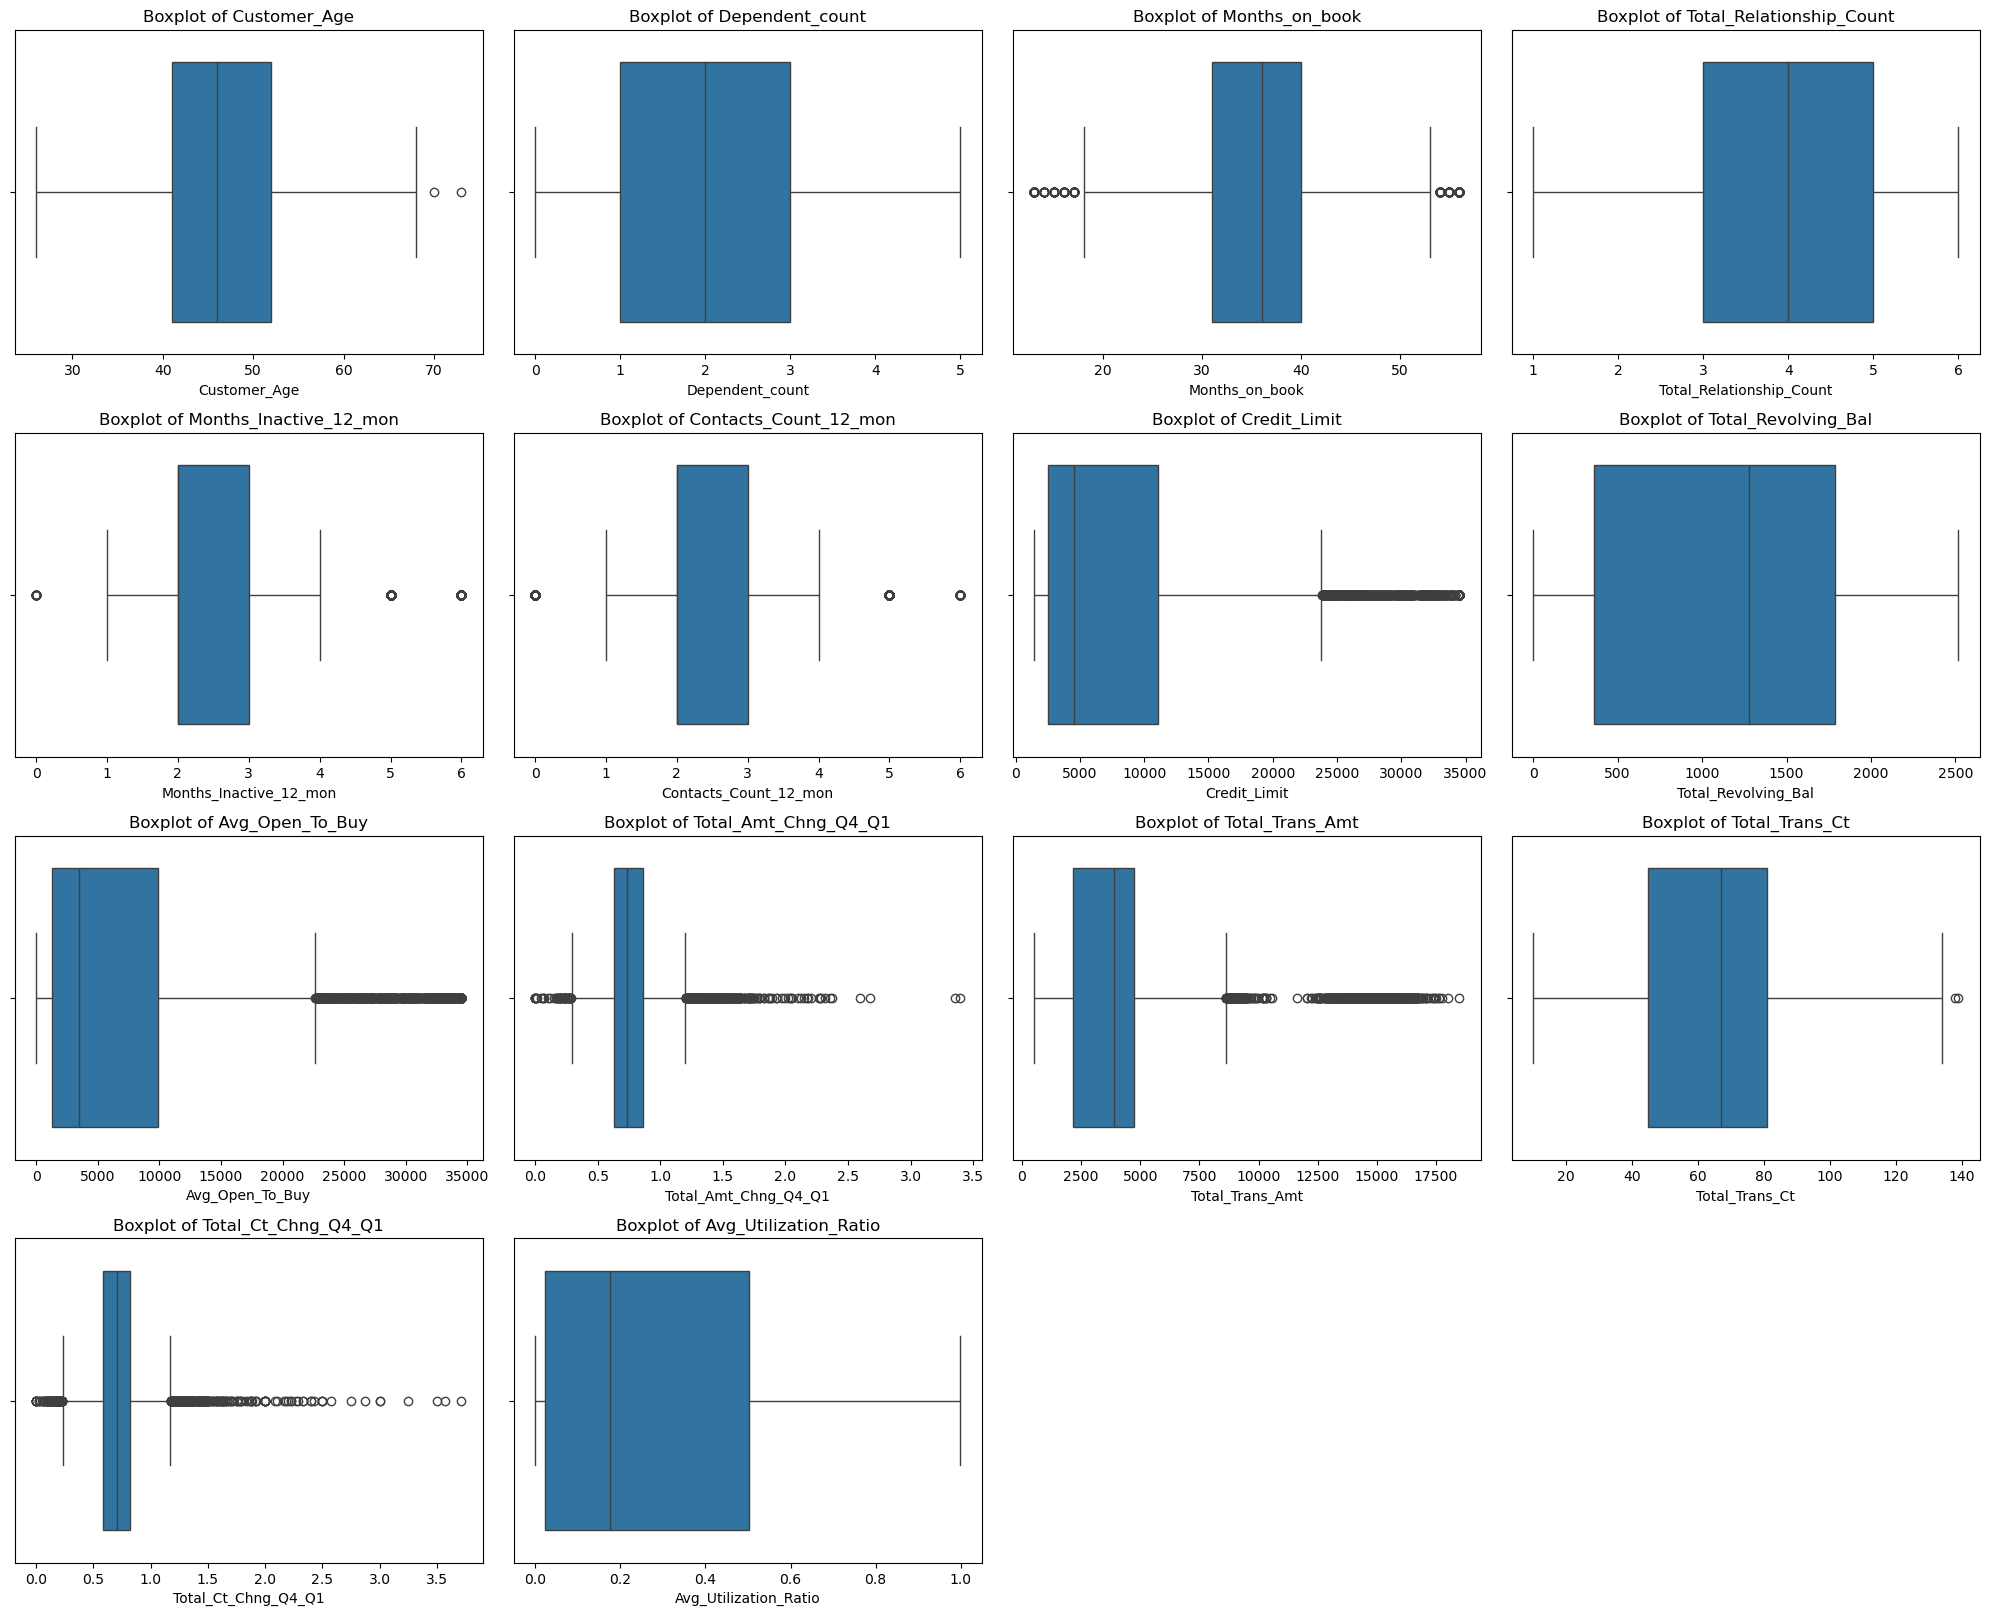

In [18]:
grid_columns = 4
grid_rows = 10

plt.figure(figsize=(grid_columns * 5, grid_rows * 4))

# Loop through each numerical column to create boxplots in grid layout
for index, column_name in enumerate(numerical_column_names, 1):
    plt.subplot(grid_rows, grid_columns, index)
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name}')

plt.tight_layout()
plt.show()

### Outlier Treatment Using Winsorization

Values below Q1 - 1.5 * IQR and above Q3 + 1.5 * IQR.

In [19]:
def winsorize_column(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe[column_name] = dataframe[column_name].clip(lower=lower_bound, upper=upper_bound)

columns_to_winsorize = ['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1']

for column_name in columns_to_winsorize:
    winsorize_column(df, column_name)

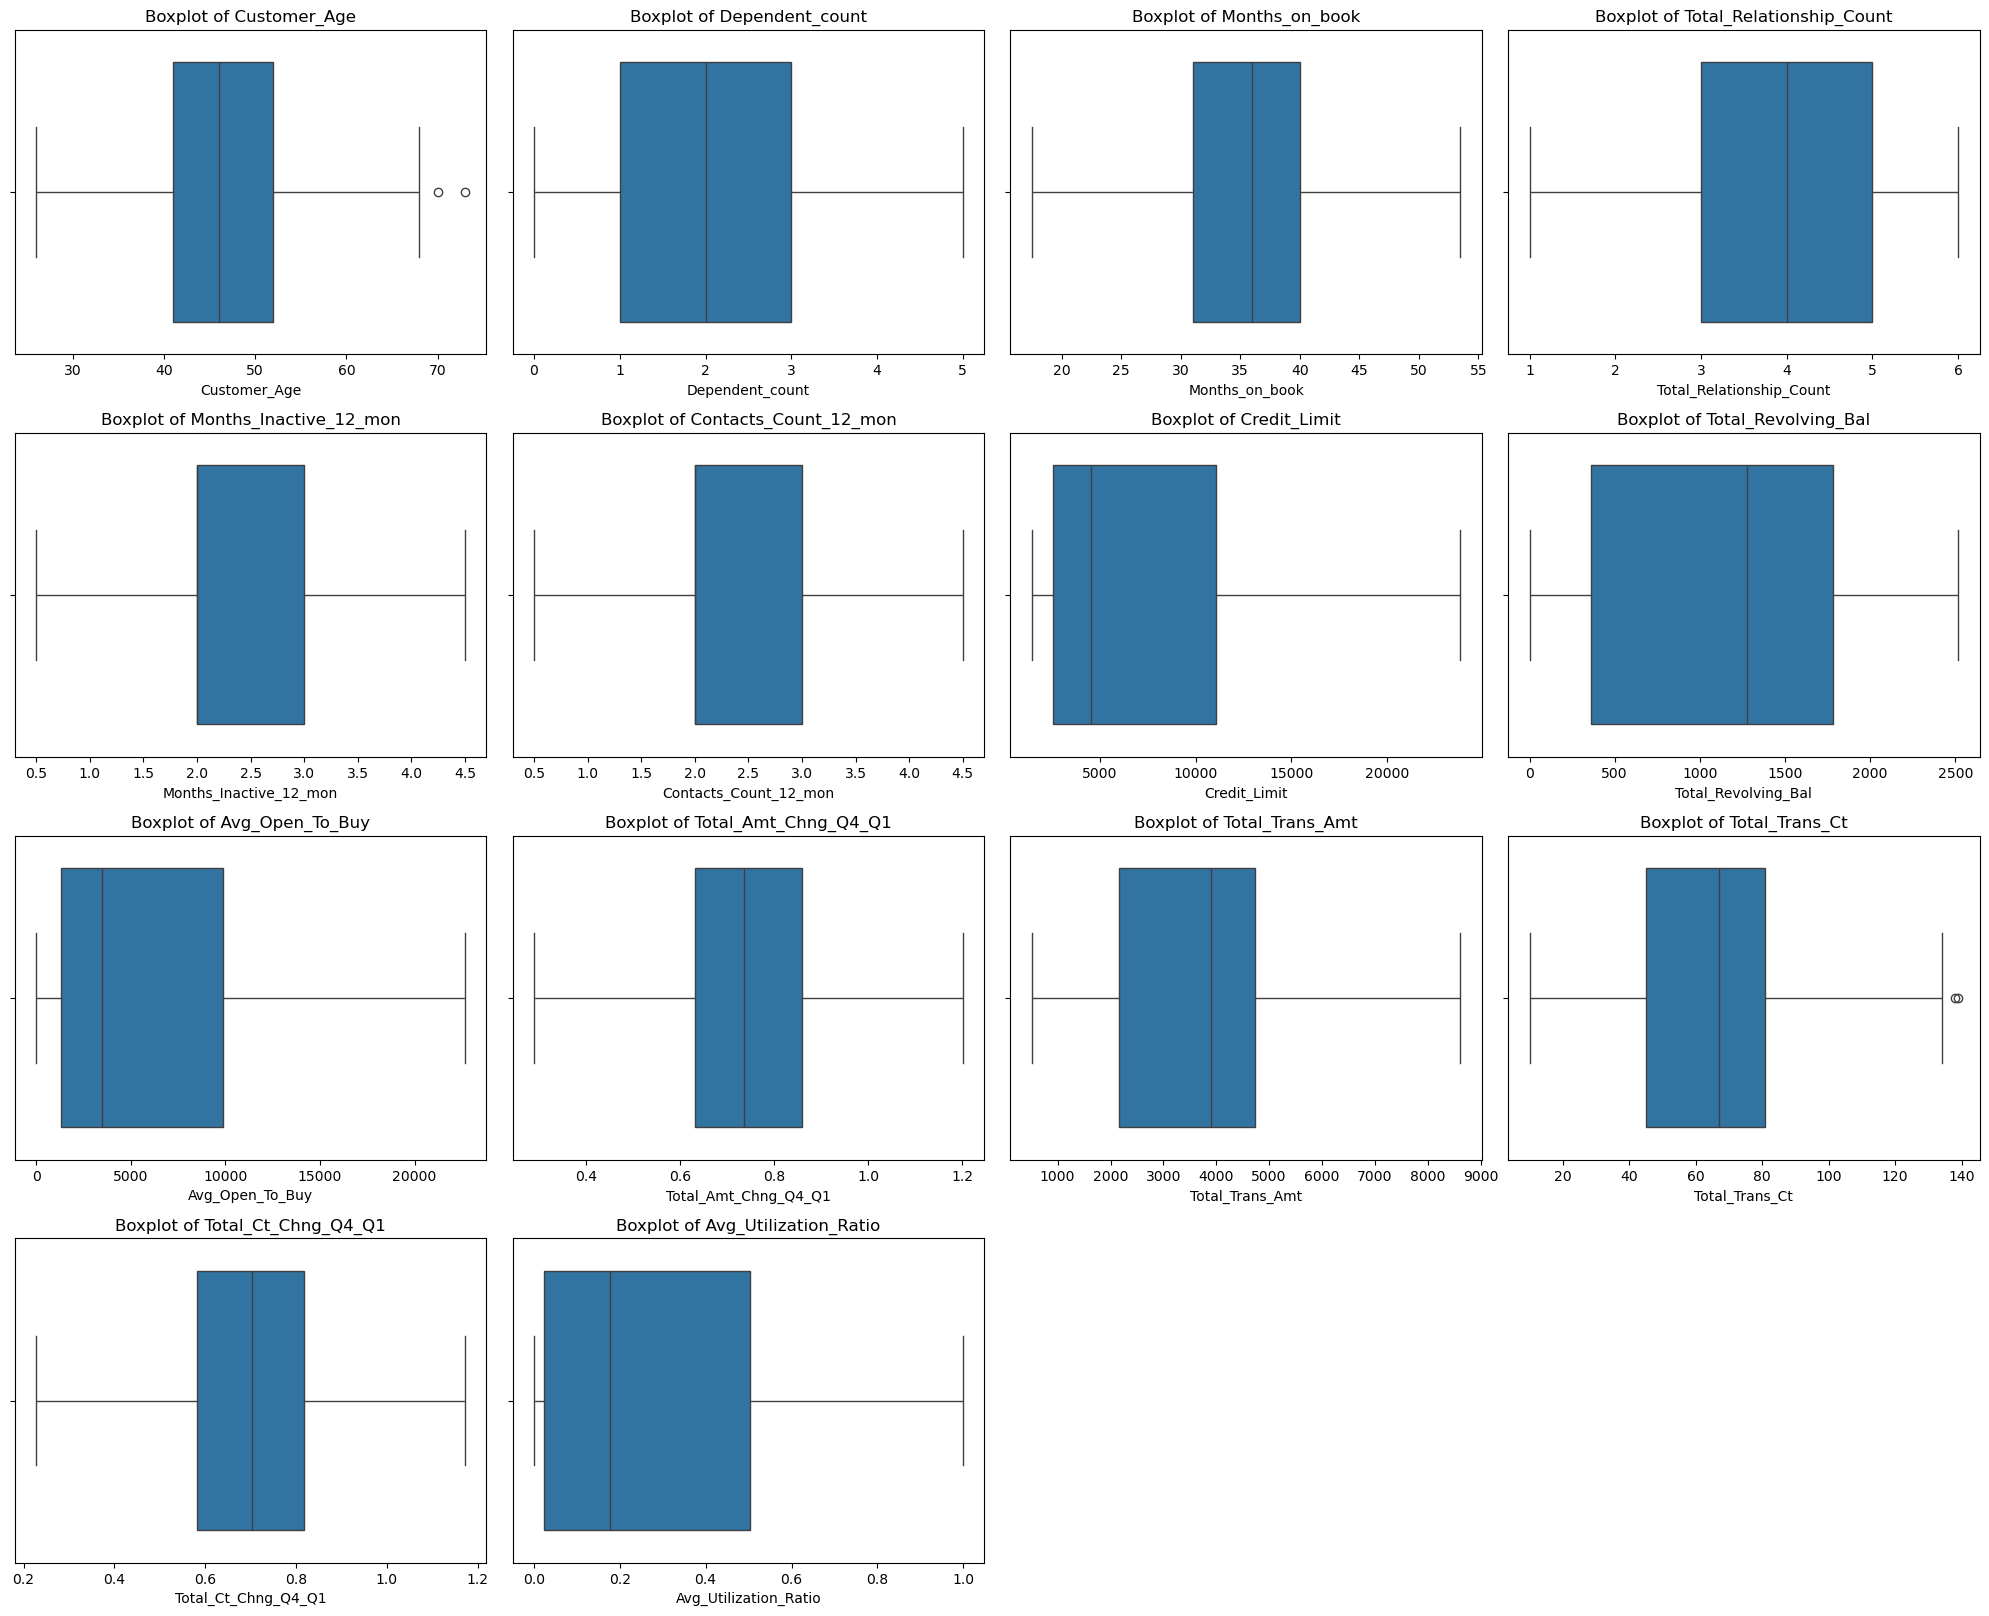

In [20]:
# Re-plot boxplots after winsorization

grid_columns = 4
grid_rows = 10

plt.figure(figsize=(grid_columns * 5, grid_rows * 4))

for index, column_name in enumerate(numerical_column_names, 1):
    plt.subplot(grid_rows, grid_columns, index)
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name}')

plt.tight_layout()
plt.show()

### Correlation analysis

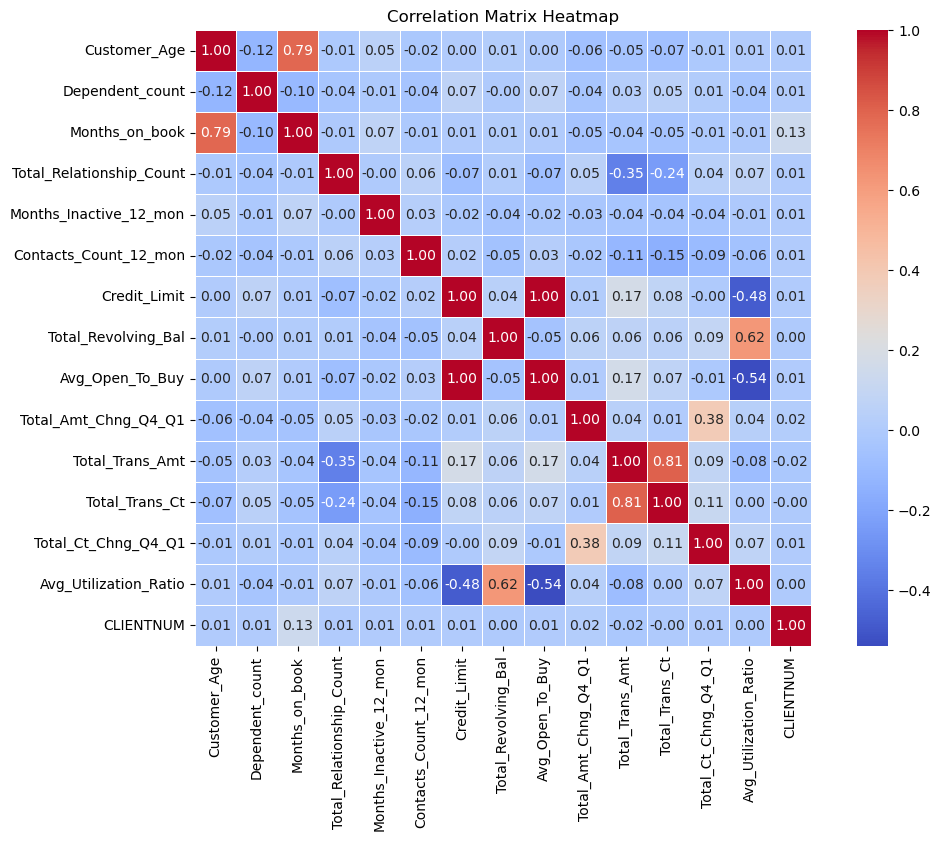

In [21]:
# Calculate and plot correlation matrix
corr_matrix = numerical_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Variable Selection, Removing Highly Correlated Variables

In [22]:
# Drop highly correlated variables
columns_to_drop = ['Avg_Open_To_Buy', 'Total_Trans_Amt', 'Months_on_book']
numerical_columns.drop(columns=columns_to_drop, inplace=True)

In [23]:
numerical_columns.shape

(10127, 12)

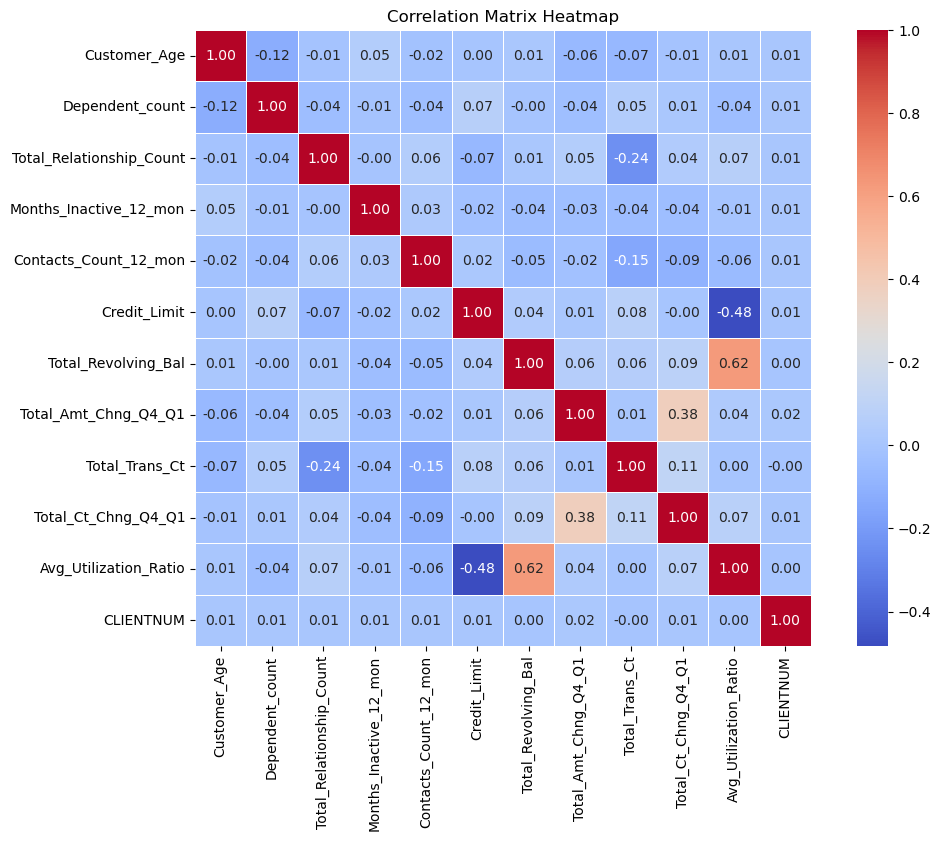

In [24]:
# Re-plot correlation matrix after dropping high correlated ariables
corr_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Categorical frequency analysis

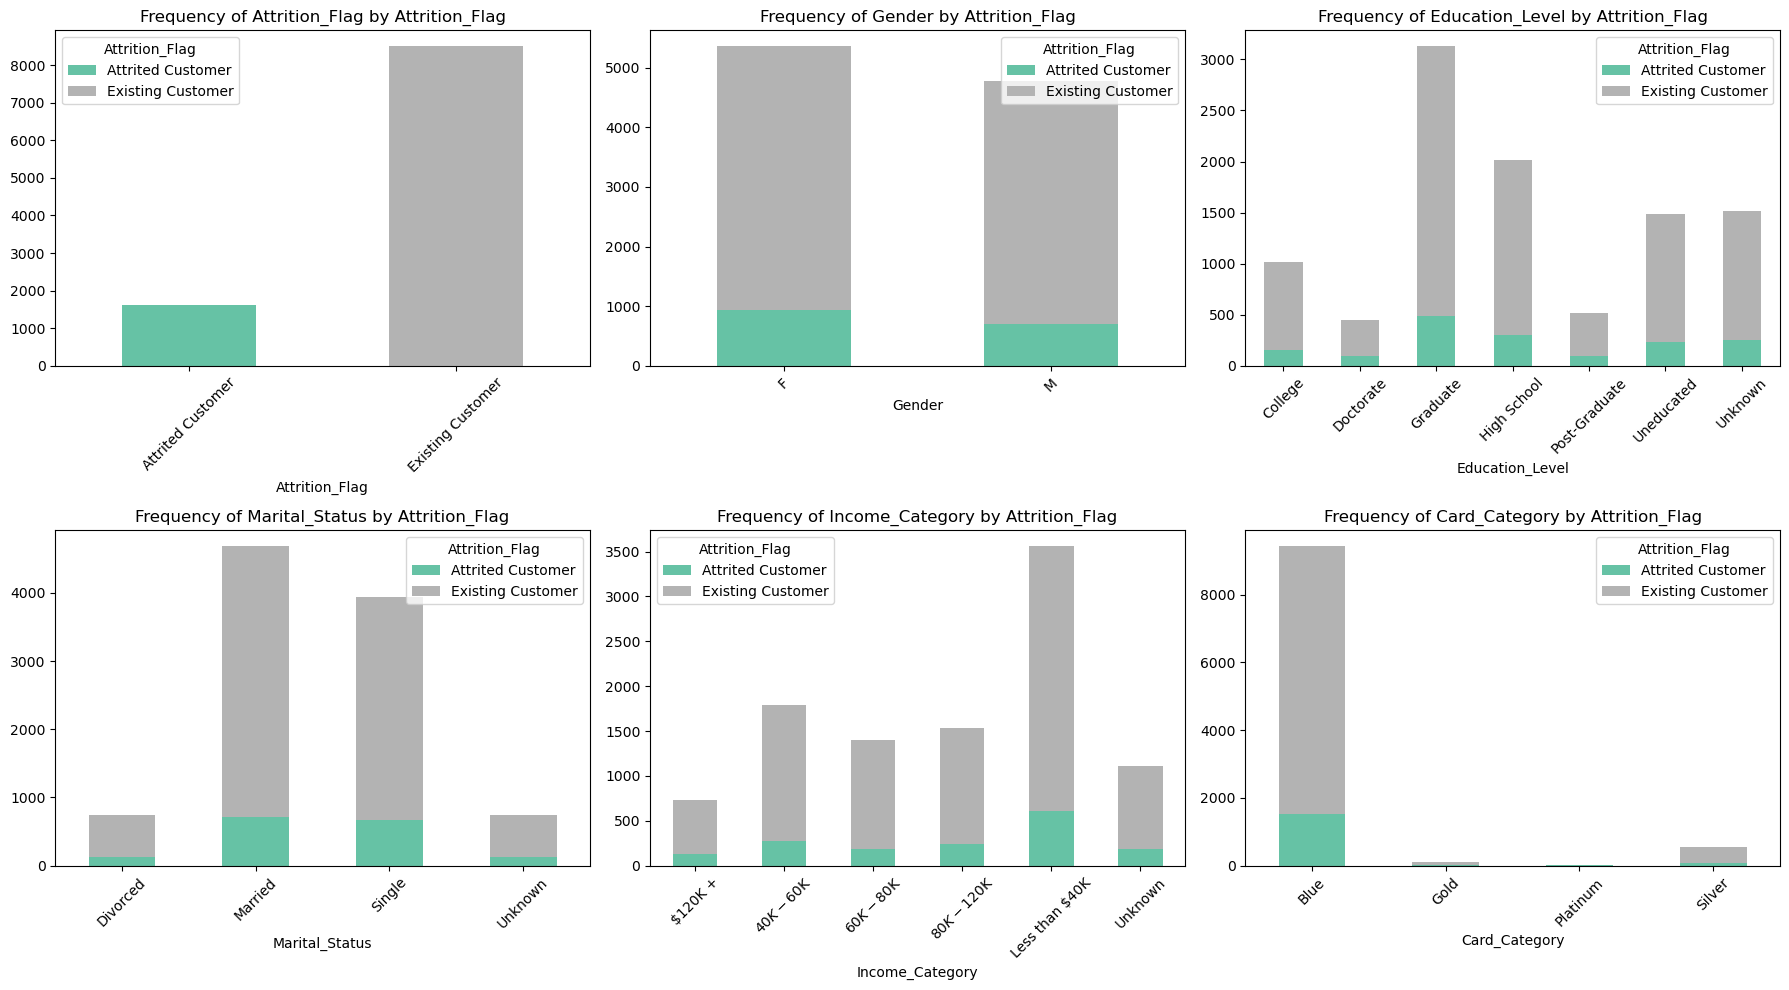

In [25]:
categorical_column_names = [col for col in df.select_dtypes(include='object').columns if col != 'CLIENTNUM']

num_grid_columns = 3
num_grid_rows = 2

fig, axes = plt.subplots(num_grid_rows, num_grid_columns, figsize=(num_grid_columns*6, num_grid_rows*5))
axes = axes.flatten()

# Loop through each categorical column and plot barplots
for index, column in enumerate(categorical_column_names):
    crosstab = pd.crosstab(df[column], df['Attrition_Flag'])
    crosstab.plot(kind='bar', stacked=True, ax=axes[index], colormap='Set2')
    axes[index].set_title(f'Frequency of {column} by Attrition_Flag')
    axes[index].set_xlabel(column)
    axes[index].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Categorical Dataset Creation

In [26]:
categorical_data = df[df.select_dtypes(include='object').columns.tolist()].copy()

# Excluding 'CLIENTNUM' and 'Attrition_Flag'
columns_to_encode = [col for col in categorical_data.columns if col not in ['CLIENTNUM', 'Attrition_Flag']]

### Categorical encoding

In [27]:
encoder = OneHotEncoder(sparse_output=False, drop=None)

encoded_array = encoder.fit_transform(categorical_data[columns_to_encode])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columns_to_encode))
encoded_df.index = categorical_data.index

encoded_df['CLIENTNUM'] = categorical_data['CLIENTNUM']

In [28]:
encoded_df.head()

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,...,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,CLIENTNUM
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,768805383
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,818770008
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,713982108
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,769911858
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,709106358


### Scaling numerical variables

In [29]:
scaler = StandardScaler()

columns_to_scale = [col for col in numerical_columns.columns if col != 'CLIENTNUM']

numerical_columns[columns_to_scale] = scaler.fit_transform(numerical_columns[columns_to_scale])

In [30]:
numerical_columns.head()

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CLIENTNUM
0,-0.165406,0.503368,0.763943,-1.327136,0.492404,0.446622,-0.473422,2.623494,-0.973895,3.834003,-0.775882,768805383
1,0.333570,2.043199,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,3.563293,-1.357340,12.608573,-0.616276,818770008
2,0.583058,0.503368,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,8.367214,-1.911206,6.807864,-0.997155,713982108
3,-0.789126,1.273283,-0.522785,1.641478,-1.315636,-0.585251,1.661686,2.942843,-1.911206,6.807864,1.759686,769911858
4,-0.789126,0.503368,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,6.455682,-1.570365,7.509325,-0.997155,709106358


### Merge datasets for final dataset

In [31]:
# Merge of numerics and dummies
df_final = numerical_columns.merge(encoded_df, on='CLIENTNUM')

In [32]:
# Merge with Attrition Flag
target_column = df[['CLIENTNUM', 'Attrition_Flag']]

df_final = pd.merge(df_final, target_column, on='CLIENTNUM', how='inner')

In [33]:
df_final.shape

(10127, 36)

In [34]:
df_final.head()

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,...,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,-0.165406,0.503368,0.763943,-1.327136,0.492404,0.446622,-0.473422,2.623494,-0.973895,3.834003,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Existing Customer
1,0.333570,2.043199,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,3.563293,-1.357340,12.608573,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Existing Customer
2,0.583058,0.503368,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,8.367214,-1.911206,6.807864,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Existing Customer
3,-0.789126,1.273283,-0.522785,1.641478,-1.315636,-0.585251,1.661686,2.942843,-1.911206,6.807864,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Existing Customer
4,-0.789126,0.503368,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,6.455682,-1.570365,7.509325,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Existing Customer


In [35]:
# Creat target
df_final['target'] = df_final['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [36]:
df_final.head()

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag,target
0,-0.165406,0.503368,0.763943,-1.327136,0.492404,0.446622,-0.473422,2.623494,-0.973895,3.834003,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,0
1,0.333570,2.043199,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,3.563293,-1.357340,12.608573,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,0
2,0.583058,0.503368,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,8.367214,-1.911206,6.807864,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,0
3,-0.789126,1.273283,-0.522785,1.641478,-1.315636,-0.585251,1.661686,2.942843,-1.911206,6.807864,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,0
4,-0.789126,0.503368,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,6.455682,-1.570365,7.509325,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,0


In [37]:
df_final.shape

(10127, 37)

### Save processed datasets

In [40]:
# Dataset for Clustering

df_clustering = df_final.drop(columns=['target'])
df_clustering.to_csv('df_clustering.csv', index=False)

In [41]:
# Dataset for predictivie Machine Learning

df_final.to_csv('df_encoded.csv', index=False)